[From official `scikit-learn` documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)<br>
Adapted by Claudio Sartori

# Classification with Decision Tree - hyperparameter tuning (__model selection__) with Grid Search and Cross Validation

We use here the Decision Tree and the standard `CrossValidation`, then find the best hyperparameter setting through _grid search_


### Workflow
1. download the data
1. data exploration
1. drop the useless data (if any)
1. separe the predicting attributes X from the class attribute y
1. split X and y into training and test
    - set a variable `target` with the column name of the target
1. single run with default parameters
    - initialise a estimator with the DecisionTreeClassifier
    - fit the estimator with the training part of X
    - show the tree structure
        - in particular, observe the maximum depth of the tree, this will be used in choosing the range for the `max_depth` hyperparameter
    - predict the y values with the fitted estimator and the train data
        - compare the predicted values with the true ones and compute the accuracy on the training set 
    - predict the y values with the fitted estimator and the test data
        - compare the predicted values with the true ones and compute the accuracy on the test set
        - this will be our baseline

## Model selection

- the *train* part will be used for training and _cross-validation_ (i.e. for *development*)
- the *test* part will be used for test (i.e. for *evaluation*)
- the fraction of test data will be __train_size__ (a value of your choice between 0.2 and 0.5)
- the function `GridSearchCV` iterates a cross validation experiment to __train__ and __validate__ a model with different combinations of paramater values
- for each parameter we set a list of values to test, the `GridSearchCV` function will generate all the combinations
- we will make several experiments with the optimisation of different *score function* 
    - e.g. `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, see this [page](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for reference
    - the output is a dictionary containing 
        - the set of parameters which maximize the score 
        - the test scores


## Highlights

- `tree_` attribute in the fitted decision tree
    - contains some useful information, such as `max_depth`
- `GridSearchCV`
    - implements *cross validation*, needs 
        - a *score to be optimized*
        - *ranges* of the hyperparameters to be optimized, the *parameters grid*
    - sets the values for `best_params_` and `best_estimator_`
- `classification_report`
- `ConfusionMatrixDisplay`



In [82]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

### Prepare the environment
Import libraries

Load the dataset `winequality-red-wi.csv`

Set the training set size and the random state

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'winequality-red.csv'

# adjust the line below, if necessary
df = pd.read_csv(url, sep=';')

df.columns 


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Read the data into a dataframe and show the size

In [84]:
shape = print(f'The dataset has the shape: {df.shape}')


The dataset has the shape: (1599, 12)


Have a quick look to the data.
- use the `.head()` function to see column names and some data
- use other exploration methods if you want

In [85]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Show an histogram of the target labels frequencies (hint: use the `value_counts` method)

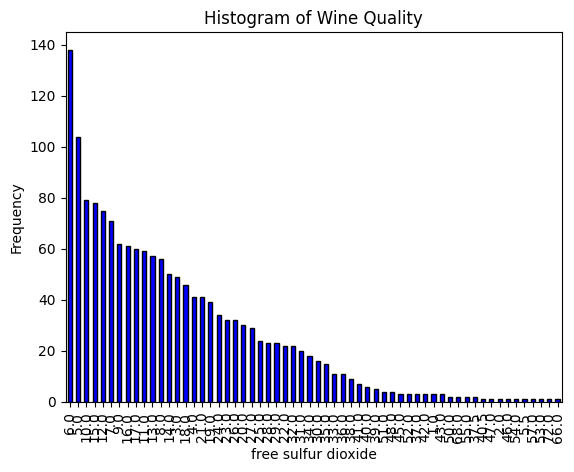

In [87]:
df['free sulfur dioxide'].value_counts().plot(kind='bar', color='blue', edgecolor='black') # adjust the color and edgecolor as you like
plt.xlabel('free sulfur dioxide')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality')
plt.show()

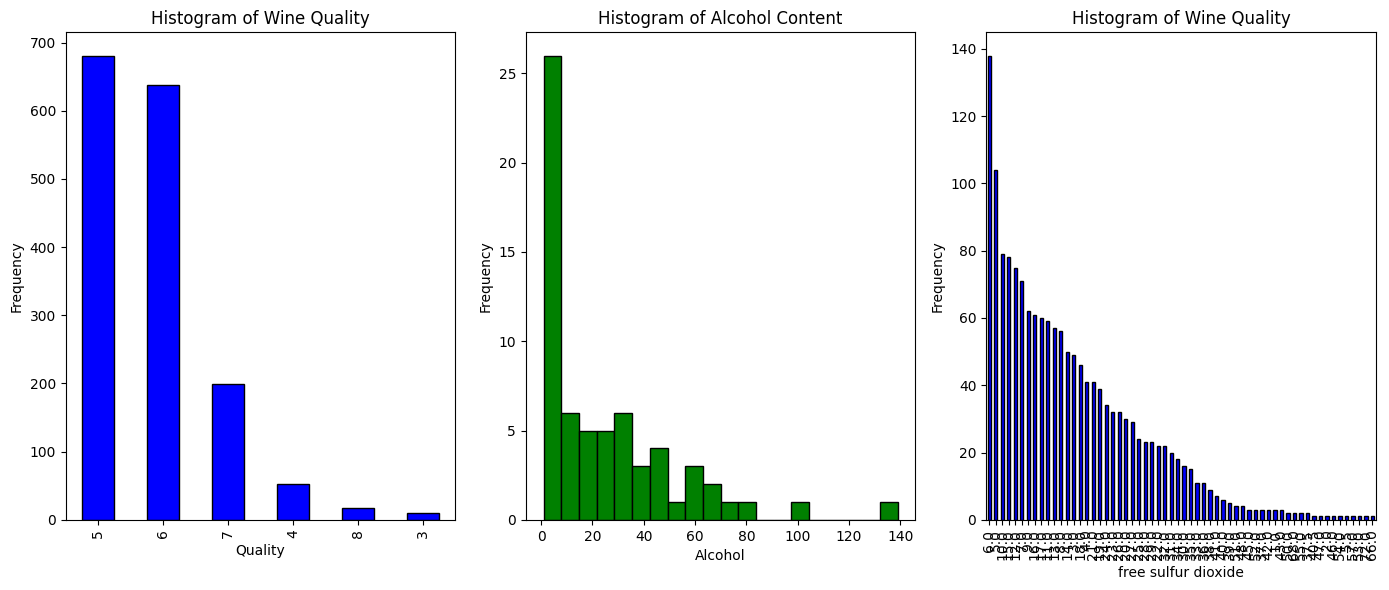

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

# Primo diagramma: Histogram of Wine Quality
df['quality'].value_counts().plot(kind='bar', ax=axes[0], color='blue', edgecolor='black')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Wine Quality')

# Secondo diagramma: Histogram of Alcohol Content
df['alcohol'].value_counts().plot(kind='hist', bins=20, ax=axes[1], color='green', edgecolor='black')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Alcohol Content')

df['free sulfur dioxide'].value_counts().plot(kind='bar', color='blue', edgecolor='black') # adjust the color and edgecolor as you like
axes[2].set_xlabel('free sulfur dioxide')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Wine Quality')


plt.tight_layout()
plt.show()

#### Split the data into the __predicting values__ `X` and the __target__ `y`
Drop also the columns which are not relevant for training a classifier, if any

The method "drop" of dataframes allows to drop either rows or columns
- the "axis" parameter chooses between dropping rows (axis=0) or columns (axis=1)

In [89]:
from sklearn.model_selection import train_test_split
train_size = 0.67
random_state = 42 # any positive integer is acceptable, it is necessary for **reproducibility

# X = df.drop('species', axis=1)
target = 'quality'

X = df.drop(target, axis=1)
print("X",X.shape)


y = df[target]
print("Y",y.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state= random_state, train_size = train_size)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

print(Xtrain.head())
print(ytrain.head())

X (1599, 11)
Y (1599,)
(1071, 11) (528, 11) (1071,) (528,)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
548            12.4             0.350         0.49             2.6      0.079   
355             6.7             0.750         0.01             2.4      0.078   
1296            6.6             0.630         0.00             4.3      0.093   
209            11.0             0.300         0.58             2.1      0.054   
140             8.4             0.745         0.11             1.9      0.090   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
548                  27.0                  69.0  0.99940  3.12       0.75   
355                  17.0                  32.0  0.99550  3.55       0.61   
1296                 51.0                  77.5  0.99558  3.20       0.45   
209                   7.0                  19.0  0.99800  3.31       0.88   
140                  16.0                  63.0  0.99650  3.19       

### Prepare the baseline: holdout method

In [90]:
print(f'There are {Xtrain.shape[0]} samples in the training dataset')
print(f'There are {Xtest.shape[0]} samples in the testing dataset')
print(f'There are {ytrain.shape[0]} samples in the training dataset')
print(f'There are {ytest.shape[0]} samples in the testing dataset')
print(f'Each sample has {Xtrain.shape[1]} features')

There are 1071 samples in the training dataset
There are 528 samples in the testing dataset
There are 1071 samples in the training dataset
There are 528 samples in the testing dataset
Each sample has 11 features


- Initialize an estimator with the required model generator `tree.DecisionTreeClassifier(random_state = random_state)`
- Fit the estimator on the train data and target

Let's see how it works on test data, and, comparing with the result on training data, see if you can suspect *overfitting*
- use the fitted estimator to predict using the test features
- compute the accuracy and store it on a variable for the final summary
- store the maximum depth of the tree, for later use 
    - `fitted_max_depth = estimator.tree_.max_depth`
- store the range of the parameter which will be used for tuning
    - `parameter_values = range(1,fitted_max_depth+1)`
- print the accuracy on the test set and the maximum depth of the tree

The accuracy on training set is 100.00%
The accuracy on test set is 57.20%
The tree has a depth of 19


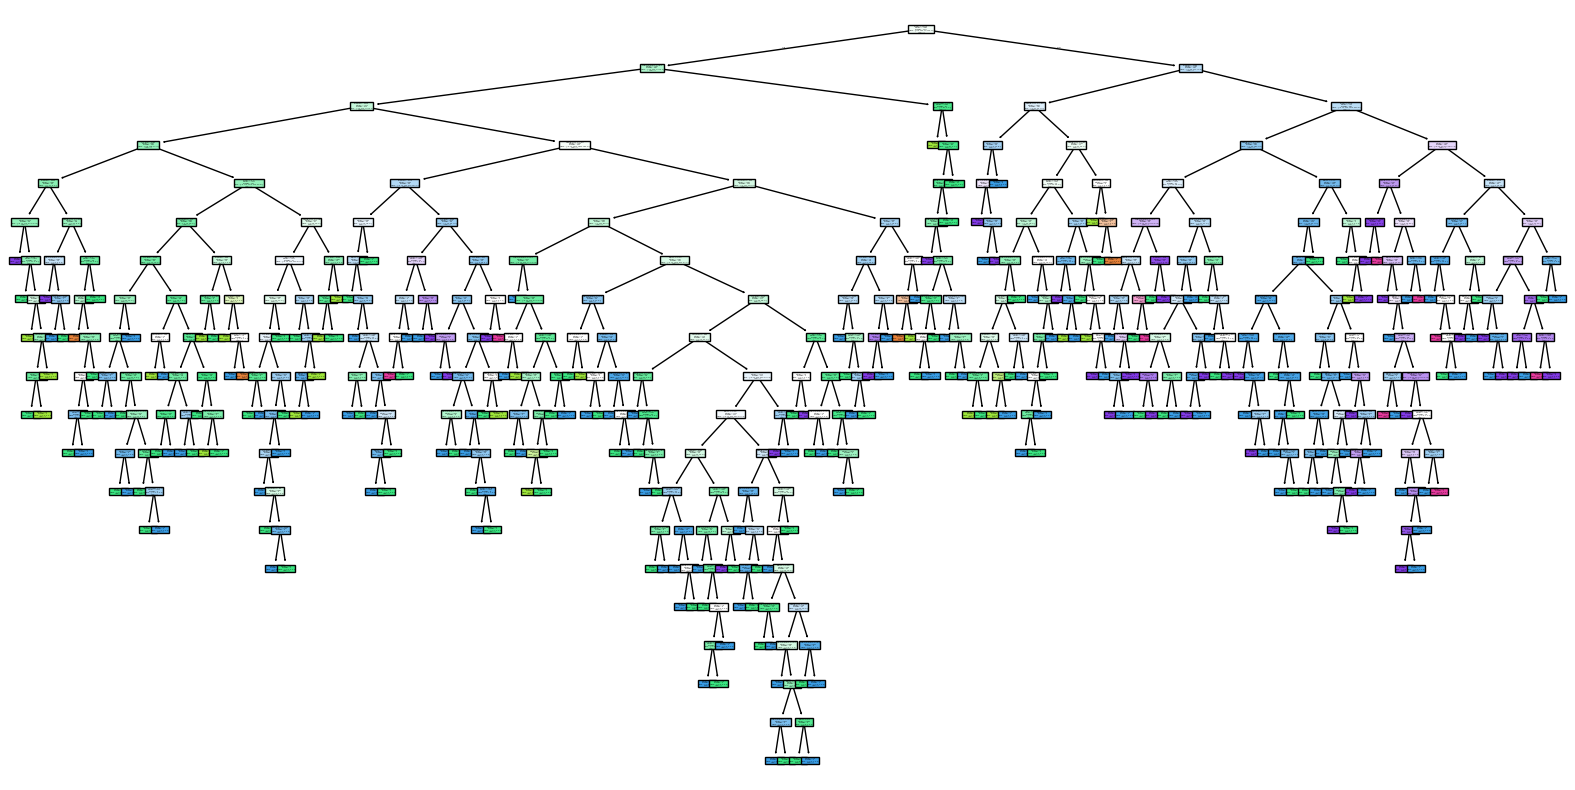

In [91]:
from sklearn.tree import DecisionTreeClassifier       # 1. choose model class
import pandas as pd

model = DecisionTreeClassifier(criterion = 'entropy') # 2. instantiate model
model.fit(Xtrain, ytrain)                             # 3. fit model to data
ytrain_dt = model.predict(Xtrain)                     # 4. predict training data

from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(ytrain, ytrain_dt)
print("The accuracy on training set is {0:.2f}%".format(accuracy_train * 100))

ytest_dt = model.predict(Xtest)                  # 4. predict on new data
accuracy_test = accuracy_score(ytest, ytest_dt)
print("The accuracy on test set is {0:.2f}%".format(accuracy_test * 100))

fitted_max_depth = model.tree_.max_depth
print(f'The tree has a depth of {fitted_max_depth}')

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['3','4','5','6','7','8'])
plt.show()

In [ ]:
from matplotlib.pyplot import figure
from sklearn.tree import plot_tree

figure(figsize = (15,15))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['3','4','5','6','7','8'])
plt.show()

plot_tree(model
#          , fontsize=6
          , filled=True
#          , feature_names = []
          , class_names = ['3','4','5','6','7','8']
          , rounded = True
          , proportion = True
         )

Prepare the decision tree parameters and the scores 

In [93]:
# Set the parameters to be explored during the rounds of cross-validation
tuned_param_dt = [{'max_depth': [*range(1,fitted_max_depth+1)]
                , 'criterion' : ['entropy', 'gini']
                , 'class_weight' : [None, 'balanced']}]

# Set the different scores that will be optimised
scores = ['accuracy'
        , 'precision_macro'
        , 'recall_macro'
        , 'f1_macro']



### Loop on scores
- iterate varying the score function
    - fit the estimator using the training data
        - the resulting model will be the best one according to the current score function
    - print the best estimator
    - print the best score
    - predict the target for the test set using the `.predict` method
    - print the `classification report`
    - display the confusion matrix with `ConfusionMatrixDisplay`

In [ ]:
for i in scores:
    print(f'The cross-validation will optimise the {i} score')
    fitted_model = GridSearchCV(DecisionTreeClassifier(), tuned_param_dt, cv=5, scoring=i)
    fitted_model.fit(Xtrain, ytrain)
    print(f'The best parameters are: {fitted_model.best_params_}')
    print(f'The best score is: {fitted_model.best_score_}')
    
    
    

The cross-validation will optimise the accuracy score
The best parameters are: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 13}
The best score is: 0.6003868724190393
The cross-validation will optimise the precision_macro score
The best parameters are: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 18}
The best score is: 0.34265604716521525
The cross-validation will optimise the recall_macro score
The best parameters are: {'class_weight': None, 'criterion': 'gini', 'max_depth': 19}
The best score is: 0.3516601396843126
The cross-validation will optimise the f1_macro score
The best parameters are: {'class_weight': None, 'criterion': 'gini', 'max_depth': 15}
The best score is: 0.3380693175183752


In [94]:
clf.best_params_

NameError: name 'clf' is not defined